In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import joblib



In [4]:
# Load the dataset
data = pd.read_csv('parkinsson disease.csv')

In [5]:
# EDA: Display basic information about the dataset
print("Dataset Info:")
print(data.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null

In [6]:
# EDA: Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(data.head())




First 5 Rows of the Dataset:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       

In [7]:
# EDA: Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())




Missing Values in Each Column:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [8]:
# EDA: Statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())




Statistical Summary:
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540  

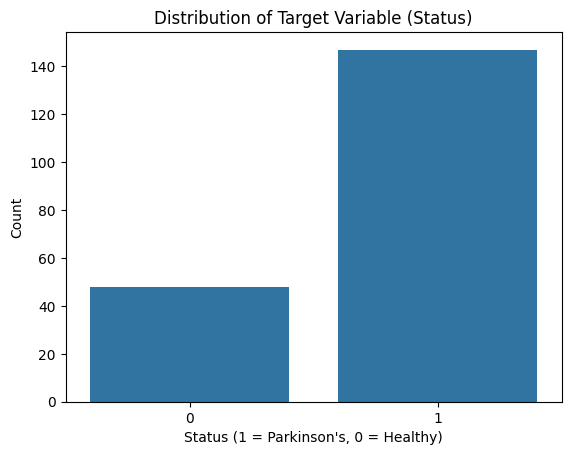

In [9]:
# EDA: Visualize the distribution of the target variable
sns.countplot(x='status', data=data)
plt.title('Distribution of Target Variable (Status)')
plt.xlabel('Status (1 = Parkinson\'s, 0 = Healthy)')
plt.ylabel('Count')
plt.show()



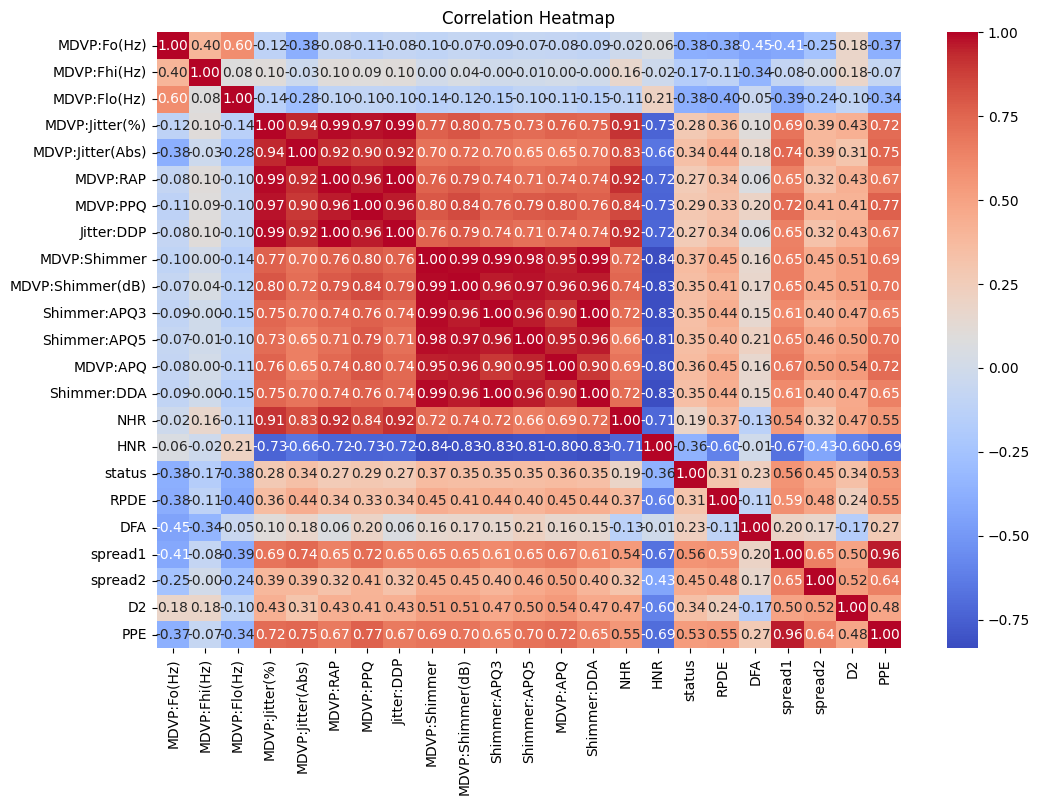

In [10]:
# EDA: Correlation heatmap (exclude non-numeric columns)
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Handle missing values (if any)
if data.isnull().sum().any():
    print("Missing values detected. Filling with mean values.")
    data.fillna(data.mean(), inplace=True)

In [12]:
# Separate features and labels
X = data.drop(['status', 'name'], axis=1)  # Drop 'status' (target) and 'name' (irrelevant)
y = data['status']  # Target variable (1 = Parkinson's, 0 = Healthy)


In [13]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [14]:
# Reshape data for LSTM (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [ ]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [16]:
# Build the LSTM model for feature extraction
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(32, activation='relu')  # Dense layer to output 32-dimensional features
])



D:\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Add EarlyStopping to prevent overfitting during training (if training is needed)
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [29]:
# Extract features using the LSTM
X_train_lstm_features = lstm_model.predict(X_train)
X_test_lstm_features = lstm_model.predict(X_test)



5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
# Train an ensemble model (Random Forest) on the extracted features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_lstm_features, y_train)



RandomForestClassifier(random_state=42)

In [31]:
# Save the models for future use
lstm_model.save('lstm_model.h5')
joblib.dump(rf_model, 'random_forest_model.pkl')

# Make predictions
y_pred = rf_model.predict(X_test_lstm_features)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Hybrid Model Test Accuracy: {accuracy * 100:.2f}%")


Hybrid Model Test Accuracy: 92.31%


In [37]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load pre-trained models once
lstm_model = load_model('lstm_model.h5')
rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Expected feature names from training data
expected_features = scaler.feature_names_in_

def evaluate_new_data(file_path):
    """Evaluates a new CSV file and predicts Parkinson's Disease."""
    try:
        # Load new data
        new_data = pd.read_csv(file_path)
        print("📊 Loaded CSV columns:", new_data.columns.tolist())

        # Identify missing and extra features
        missing_cols = [col for col in expected_features if col not in new_data.columns]
        extra_cols = [col for col in new_data.columns if col not in expected_features]

        # Handle missing columns by filling with mean or zero
        for col in missing_cols:
            print(f"⚠️ Missing column: {col}. Filling with 0.")
            new_data[col] = 0  # Replace with mean if necessary

        # Drop extra columns
        if extra_cols:
            print(f"🗑️ Dropping extra columns: {extra_cols}")
            new_data = new_data.drop(columns=extra_cols)

        # Ensure correct column order
        new_data = new_data[expected_features]

        # Scale data
        new_data_scaled = scaler.transform(new_data)
        new_data_reshaped = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

        # Extract features using LSTM
        new_data_features = lstm_model.predict(new_data_reshaped)

        # Predict using Random Forest
        new_predictions = rf_model.predict(new_data_features)
        print("✅ Predictions:", new_predictions)
        return new_predictions

    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# Example usage
evaluate_new_data("C:/Users/Lenovo/Desktop/dVerse/sample.csv")

📊 Loaded CSV columns: ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%) ', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'HNR', 'status']
⚠️ Missing column: MDVP:Jitter(%). Filling with 0.
⚠️ Missing column: Jitter:DDP. Filling with 0.
⚠️ Missing column: Shimmer:APQ3. Filling with 0.
⚠️ Missing column: Shimmer:APQ5. Filling with 0.
⚠️ Missing column: MDVP:APQ. Filling with 0.
⚠️ Missing column: Shimmer:DDA. Filling with 0.
⚠️ Missing column: NHR. Filling with 0.
⚠️ Missing column: RPDE. Filling with 0.
⚠️ Missing column: DFA. Filling with 0.
⚠️ Missing column: spread1. Filling with 0.
⚠️ Missing column: spread2. Filling with 0.
⚠️ Missing column: D2. Filling with 0.
⚠️ Missing column: PPE. Filling with 0.
🗑️ Dropping extra columns: ['name', 'MDVP:Jitter(%) ', 'status']
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
✅ Predictions: [1 0 0 0 0 0 0 0 0 0]


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
import os

print("LSTM Model Exists:", os.path.exists('lstm_model.h5'))
print("Random Forest Model Exists:", os.path.exists('random_forest_model.pkl'))
print("Scaler Exists:", os.path.exists('scaler.pkl'))


LSTM Model Exists: True
Random Forest Model Exists: True
Scaler Exists: True
